In [2]:
# Data wrangling
import pandas as pd
import numpy as np

# for Visulization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")

# data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score

#Dataset masuk
df2 = pd.read_csv('./laptops_test.csv')
df1 = pd.read_csv('./laptop_data.csv')


#cek bentuk data
print("df1 shape : ", df1.shape)
print("df2 shape : ", df2.shape)

df1 shape :  (1303, 12)
df2 shape :  (325, 13)


In [3]:
df1

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [4]:
df2

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,HP,15-bs053od (i7-7500U/6GB/1TB/W10),Notebook,"15.6""",1366x768,Intel Core i7 7500U 2.7GHz,6GB,1TB HDD,Intel HD Graphics 620,Windows,10,2.04kg,5148468.0
1,Asus,Rog GL753VE-DS74,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows,10,2.99kg,15552108.0
2,Dell,Inspiron 7579,2 in 1 Convertible,"15.6""",IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12GB,512GB SSD,Intel HD Graphics 620,Windows,10,2.19kg,11550708.0
3,Toshiba,Portege Z30-C-1CV,Notebook,"13.3""",Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows,7,1.2kg,10625940.0
4,Lenovo,IdeaPad 320-15ABR,Notebook,"15.6""",Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,6GB,256GB SSD,AMD Radeon 530,Windows,10,2.2kg,4881708.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,"14.0""",IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows,10,1.8kg,5673096.0
321,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,"13.3""",IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows,10,1.3kg,13329108.0
322,Lenovo,IdeaPad 100S-14IBR,Notebook,"14.0""",1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows,10,1.5kg,2036268.0
323,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,"15.6""",1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows,10,2.19kg,6793488.0


In [5]:
# Ganti nama fitur "Manufactur" -> "Company"
df2 = df2.rename(columns={'Manufacturer' : 'Company'})

# Ganti nama fitur "Category" -> "TypeName"
df2 = df2.rename(columns={'Category' : 'TypeName'})

# Ganti nama fitur CPU" -> "Cpu"
df2 = df2.rename(columns={"CPU": "Cpu"})

# Ganti nama fitur "RAM" -> "Ram"
df2 = df2.rename(columns={"RAM": "Ram"})

# Ganti nama fitur "Storage" -> "Memory"
df2 = df2.rename(columns={"Storage": "Memory"})

# Ganti nama fitur "GPU" -> "Gpu "
df2 = df2.rename(columns={"GPU": "Gpu "})

In [6]:
# Ganti nama fitur "Storage" -> "Memory"
df1 = df1.rename(columns={"Memory": "Storage"})
df1

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Storage,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [7]:
#Gabungin Buat Identitas Laptop
df1['Nama'] = df1.apply(lambda row: row['Company'] + " " + row['TypeName'] + " " + row['Cpu']+ " " + row['Ram'] , axis = 1)

#Gabungin Buat Identitas Laptop
df2['Nama'] = df2.apply(lambda row: row['Company'] + " " + row['TypeName'] + " " + row['Cpu']+ " " + row['Ram'] , axis = 1)
df2['Price'] = df2['Price'] / 100 

In [8]:
df0 = pd.concat([df1, df2], ignore_index=False)

In [9]:
df0 = df0.drop(["Inches", "Unnamed: 0", "Screen Size", "Screen", "Model Name", "ScreenResolution", "Weight", "Operating System", "Operating System Version"], axis = 1)

In [10]:
# Removing the GB string form Ram column
df0['Ram'] = df0['Ram'].str.replace('GB', '')
# Changing the dtype of column - Ram and Weight Column
df0['Ram'] = df0['Ram'].astype('int32')
df0['Ram']

0       8
1       8
2       8
3      16
4       8
       ..
320     4
321    16
322     2
323     6
324     4
Name: Ram, Length: 1628, dtype: int32

In [11]:
# Memisahkan fitur storage menjadi daftar substring
split_prosesor = df0["Cpu"].str.split(" ")

# Mengambil angka frekuensi CPU
frekuensi_cpu = split_prosesor.str[-1]

# Mengkonversi frekuensi CPU ke float
df0["Cpu"] = frekuensi_cpu.str.replace("GHz", "")
df0["Cpu"] = df0['Cpu'].astype('float32')

In [12]:
#Price Process
#INR to IDR
df0['Price'] = df0['Price'] * 188.31 

#Redominasi
df0['Price'] = df0['Price'] / 1000000

#Deskripsi nilai Price
print("Price : ", df0['Price'].describe())

Price :  count    1628.000000
mean       12.741994
std         8.540929
min         1.745769
25%         6.511519
50%        10.745511
75%        16.956035
max        66.559488
Name: Price, dtype: float64


In [13]:
#Deskripsi nilai TypeName == Gaming
gaming_df = df0.query("TypeName == 'Gaming'")

#Deskripsi nilai TypeName == 2 in 1 Convertible
Convertible_df = df0.query("TypeName == '2 in 1 Convertible'")

#Deskripsi nilai TypeName == Netbook
Netbook_df = df0.query("TypeName == 'Netbook'")

#Deskripsi nilai TypeName == Notebook
Notebook_df = df0.query("TypeName == 'Notebook'")

#Deskripsi nilai TypeName == Ultrabook
Ultrabook_df = df0.query("TypeName == 'Ultrabook'")

#Deskripsi nilai TypeName == Workstation
Workstation_df = df0.query("TypeName == 'Workstation'")

print('Gaming :\n ',gaming_df.describe())
print('\n2 in 1 :\n ',Convertible_df.describe())
print('\nNetbook :\n ',Netbook_df.describe())
print('\nNotebook :\n ',Notebook_df.describe())
print('\nUltrabook :\n ',Ultrabook_df.describe())
print('\nWorkstation :\n',Workstation_df.describe())

Gaming :
                Cpu         Ram       Price
count  260.000000  260.000000  260.000000
mean     2.712692   14.000000   19.652051
std      0.137660    7.468854    9.952478
min      2.100000    4.000000    7.013177
25%      2.600000    8.000000   12.029755
50%      2.800000   16.000000   17.138225
75%      2.800000   16.000000   24.662824
max      3.200000   64.000000   66.559488

2 in 1 :
                Cpu         Ram       Price
count  156.000000  156.000000  156.000000
mean     2.170385    8.615385   14.595577
std      0.536635    4.149561    7.607739
min      0.900000    2.000000    2.759118
25%      1.750000    4.000000    8.417819
50%      2.500000    8.000000   13.448514
75%      2.525000    8.000000   19.052965
max      2.800000   16.000000   40.856641

Netbook :
               Cpu        Ram      Price
count  33.000000  33.000000  33.000000
mean    1.686061   4.727273   8.005152
std     0.447953   3.493500   8.458899
min     1.100000   2.000000   1.745769
25%     1.500

In [14]:
# Replace type values
# berdasarkan persebaran dan rata-rata yang sudah ditampilkan
df0["TypeName"] = df0["TypeName"].replace({
    "2 in 1 Convertible": 3,
    "Gaming": 6,
    "Netbook": 1,
    "Notebook": 2,
    "Ultrabook": 4,
    "Workstation" : 5
})

# Print dataframe
print(df0)

    Company  TypeName  Cpu  Ram              Storage  \
0     Apple         4  2.3    8            128GB SSD   
1     Apple         4  1.8    8  128GB Flash Storage   
2        HP         2  2.5    8            256GB SSD   
3     Apple         4  2.7   16            512GB SSD   
4     Apple         4  3.1    8            256GB SSD   
..      ...       ...  ...  ...                  ...   
320  Lenovo         3  2.5    4                  NaN   
321  Lenovo         3  2.5   16                  NaN   
322  Lenovo         2  1.6    2                  NaN   
323      HP         2  2.5    6                  NaN   
324    Asus         2  1.6    4                  NaN   

                              Gpu  OpSys      Price  \
0    Intel Iris Plus Graphics 640  macOS  13.441320   
1          Intel HD Graphics 6000  macOS   9.019206   
2           Intel HD Graphics 620  No OS   5.769065   
3              AMD Radeon Pro 455  macOS  25.458634   
4    Intel Iris Plus Graphics 650  macOS  18.095802 

In [15]:
#Cek null pada data train
print(df0.isnull().sum(), "\n")

Company        0
TypeName       0
Cpu            0
Ram            0
Storage      325
Gpu          325
OpSys        325
Price          0
Nama           0
 Storage    1303
Gpu         1303
dtype: int64 



In [16]:
#Cek data duplikat
print(df0.duplicated().sum())

62


In [17]:
#Karena Nama Berpengaruh pada program
# Hapus data duplikat berdasarkan kolom "nama"
df0 = df0.drop_duplicates()

In [18]:
df0

,Company,TypeName,Cpu,Ram,Storage,Gpu,OpSys,Price,Nama,Storage,Gpu
0,Apple,4,2.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,13.441320,Apple Ultrabook Intel Core i5 2.3GHz 8GB,NaN,NaN
1,Apple,4,1.8,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,9.019206,Apple Ultrabook Intel Core i5 1.8GHz 8GB,NaN,NaN
2,HP,2,2.5,8,256GB SSD,Intel HD Graphics 620,No OS,5.769065,HP Notebook Intel Core i5 7200U 2.5GHz 8GB,NaN,NaN
3,Apple,4,2.7,16,512GB SSD,AMD Radeon Pro 455,macOS,25.458634,Apple Ultrabook Intel Core i7 2.7GHz 16GB,NaN,NaN
4,Apple,4,3.1,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,18.095802,Apple Ultrabook Intel Core i5 3.1GHz 8GB,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
291,Asus,2,2.5,4,NaN,NaN,NaN,12.061416,Asus Notebook Intel Core i7 6500U 2.5GHz 4GB,500GB HDD,Nvidia GeForce 920M
292,Lenovo,3,2.5,4,NaN,NaN,NaN,10.683007,Lenovo 2 in 1 Convertible Intel Core i7 6500U ...,128GB SSD,Intel HD Graphics 520
293,Lenovo,3,2.5,16,NaN,NaN,NaN,25.100043,Lenovo 2 in 1 Convertible Intel Core i7 6500U ...,512GB SSD,Intel HD Graphics 520
294,Lenovo,2,1.6,2,NaN,NaN,NaN,3.834496,Lenovo Notebook Intel Celeron Dual Core N3050 ...,64GB Flash Storage,Intel HD Graphics


In [19]:
# Tes lagi apakah Nama sudah tidak duplikat
nama_kolom_duplikat = []

for i in range(len(df0.columns)):
    if df0[df0.columns[i]].value_counts().max() > 1:
        nama_kolom_duplikat.append(df0.columns[i])

print(nama_kolom_duplikat)

['Company', 'TypeName', 'Cpu', 'Ram', 'Storage', 'Gpu', 'OpSys', 'Price', 'Nama', ' Storage', 'Gpu ']


In [20]:
#Input Prediktor
X = df0[['TypeName', 'Price', 'Cpu', 'Ram']]
y = df0['Nama']

C:\Users\ragil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ragil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ragil\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


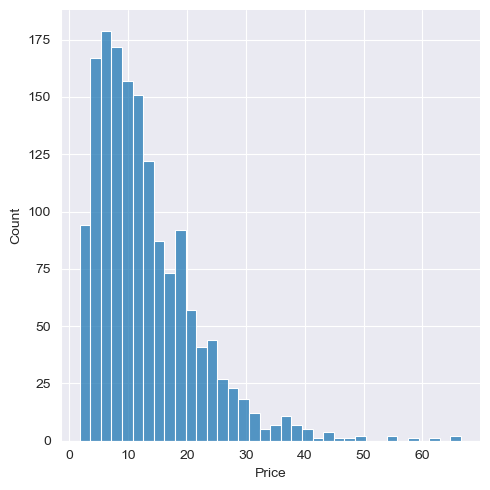

In [21]:
sns.displot(df0['Price'])

C:\Users\ragil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ragil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ragil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ragil\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


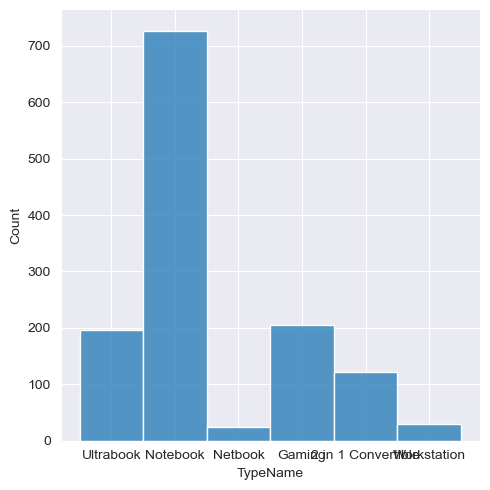

In [22]:
sns.displot(df1['TypeName'])

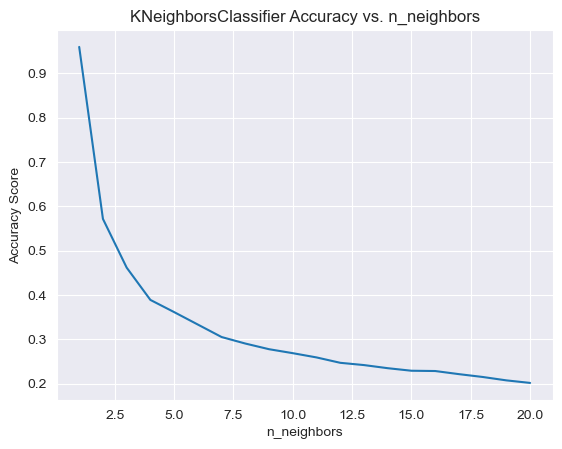

In [23]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create a list of n_neighbors values
n_neighbors_list = range(1, 21)

# Create a list to store accuracy scores
accuracy_scores = []

# Train and evaluate the KNN model for each n_neighbors value
for n_neighbors in n_neighbors_list:
    # Create a KNN classifier instance
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)

    # Train the model
    knn.fit(X, y)

    # Predict the labels for the test data
    y_pred = knn.predict(X)

    # Calculate the accuracy score
    accuracy = accuracy_score(y, y_pred)

    # Append the accuracy score to the list
    accuracy_scores.append(accuracy)

# Plot the accuracy scores vs. n_neighbors
plt.plot(n_neighbors_list, accuracy_scores)
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy Score')
plt.title('KNeighborsClassifier Accuracy vs. n_neighbors')
plt.show()


In [27]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X, y)

# Predict the labels for the test data
y_pred = knn.predict(X)

# Calculate the accuracy score
accuracy = accuracy_score(y, y_pred)
print("Accuracy :", accuracy)

Accuracy : 0.9591315453384419


In [28]:
from sklearn.metrics import classification_report

print(classification_report(y, y_pred))

                                                                      precision    recall  f1-score   support

    Acer 2 in 1 Convertible Intel Celeron Dual Core N3060 1.6GHz 4GB       1.00      1.00      1.00         1
    Acer 2 in 1 Convertible Intel Celeron Dual Core N3350 2.0GHz 4GB       1.00      1.00      1.00         1
    Acer 2 in 1 Convertible Intel Celeron Quad Core N3160 1.6GHz 4GB       1.00      1.00      1.00         1
              Acer 2 in 1 Convertible Intel Core i5 6200U 2.3GHz 8GB       1.00      1.00      1.00         1
              Acer 2 in 1 Convertible Intel Core i5 8250U 1.6GHz 8GB       1.00      1.00      1.00         2
              Acer 2 in 1 Convertible Intel Core i7 6500U 2.5GHz 8GB       1.00      1.00      1.00         1
               Acer 2 in 1 Convertible Intel Core i7 7Y75 1.3GHz 8GB       1.00      1.00      1.00         2
                        Acer Gaming Intel Core i5 7300HQ 2.5GHz 16GB       1.00      1.00      1.00         1
         

C:\Users\ragil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ragil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ragil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
#Input Prediktor
X1 = df0[['TypeName', 'Price']]
y1 = df0['Nama']

In [32]:
knn1 = KNeighborsClassifier(n_neighbors=1)

knn1.fit(X1, y1)

# Predict the labels for the test data
y_pred1 = knn1.predict(X1)

# Calculate the accuracy score
accuracy = accuracy_score(y1, y_pred1)
print("Accuracy :", accuracy)

Accuracy : 0.7879948914431673


In [33]:
from sklearn.metrics import classification_report

print(classification_report(y1, y_pred1))

                                                                      precision    recall  f1-score   support

    Acer 2 in 1 Convertible Intel Celeron Dual Core N3060 1.6GHz 4GB       1.00      1.00      1.00         1
    Acer 2 in 1 Convertible Intel Celeron Dual Core N3350 2.0GHz 4GB       1.00      1.00      1.00         1
    Acer 2 in 1 Convertible Intel Celeron Quad Core N3160 1.6GHz 4GB       1.00      1.00      1.00         1
              Acer 2 in 1 Convertible Intel Core i5 6200U 2.3GHz 8GB       1.00      1.00      1.00         1
              Acer 2 in 1 Convertible Intel Core i5 8250U 1.6GHz 8GB       0.50      0.50      0.50         2
              Acer 2 in 1 Convertible Intel Core i7 6500U 2.5GHz 8GB       1.00      1.00      1.00         1
               Acer 2 in 1 Convertible Intel Core i7 7Y75 1.3GHz 8GB       1.00      1.00      1.00         2
                        Acer Gaming Intel Core i5 7300HQ 2.5GHz 16GB       0.00      0.00      0.00         1
         

C:\Users\ragil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ragil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ragil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
